# **Convolution and Pooling operations from scratch** #

* Vector implementation of a convolution, max and average pooling operation
* These can not be used to build a neural network!
* Numpy will be used to implement from scratch
* To give a better illustration famous Lenna image and Gabor filters will be used


In [1]:
import numpy as np
from PIL import Image
from sklearn import datasets
import matplotlib.pyplot as plt


In [2]:
img = Image.open('lenna.png').convert('L') #Convert RGB image to grayscale
img.show()

In [3]:
print("Size of the image is: "+ str(img.size))


Size of the image is: (220, 220)


In [47]:
l1_filter = np.zeros((2,3,3)) #It will be our kernel 
# It consists of 2 different filters and 3x3 kernel -> 3 row and 3 column
# I will use graysclae image thus my filter size can be 2 dimentional
# If you want to use RGB image filter should be 3 dimentional -> last dimention for channels

In [48]:
l1_filter[0, :, :] = np.array([[[-1, 0, 1],
                                   [-1, 0, 1],
                                   [-1, 0, 1]]])
l1_filter[1, :, :] = np.array([[[1,   1,  1],
                                   [0,   0,  0],
                                   [-1, -1, -1]]])

In [49]:
#This function was taken from numpy.org
def pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    

In [50]:
def convolution(input_, conv_filter, padding=0, stride=1):
    
    input_ = np.array(input_)
    
    
    if padding != 0:
        input_ = np.pad(input_, 1, pad_with, padder=0)
        
    number_of_filters = conv_filter.shape[0]
    input_len = input_.shape[-1]
    
    kernel_size = conv_filter[0, :, :].shape[0]

    
    if (input_len - kernel_size + 2*padding)%stride == 0:
        print ("Input size and kernel size are matching")
    else:
        print("Input size and kernel size are not matching! Process is terminated")
        
        return None
    
    output_size = int((input_len - kernel_size + 2*padding)/stride + 1)
    output = np.zeros((output_size,output_size,number_of_filters))
    
    
    for filter_number in range (number_of_filters):
    
        W = conv_filter[filter_number, :, :]
        col_index=0
        left_col_border=0
        bias = np.zeros(number_of_filters)
    
        for right_col_border in range(kernel_size,input_len+1,stride): #i is started from kernel_length and goes at the end of the input with stride
        
            left_row_border=0
            row_index=0
        
            for right_row_border in range(kernel_size,input_len+1,stride): #i is started from kernel_length and goes at the end of the input with stride
           
                output[row_index,col_index,filter_number] = np.sum(input_[left_row_border:right_row_border,left_col_border:right_col_border] * W) + bias[filter_number]
    
                left_row_border += stride
                row_index += 1
        
            left_col_border += stride
            col_index += 1

            
    return output

In [51]:
output = convolution(img, l1_filter,padding=0, stride=1)

Input size and kernel size are matching


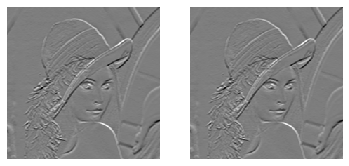

In [52]:
figure = plt.figure()
num_of_images = output.shape[-1]
for index in range(1, num_of_images + 1):
    plt.subplot(1, num_of_images, index)
    plt.axis('off')
    plt.imshow(output[:,:,i].squeeze(), cmap='gray_r')
plt.show()

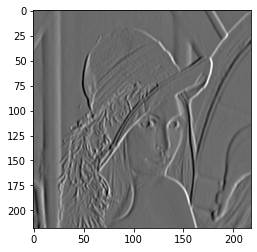

In [41]:
plt.imshow(filt1.squeeze(), cmap='gray_r');
plt.show()

In [24]:
output.shape

(218, 218, 2)

In [89]:
#Max Pooling

In [90]:
output.shape

(218, 218, 2)

In [91]:
layer = output
window = 2
stride = 1
if (W1-F)%stride == 0:
        print ("Input size and kernel size are matching")

Input size and kernel size are matching


In [92]:
input_ = layer

In [93]:
F = window #length of the pooling layer
S = stride
W1 = layer.shape[0]
H1 = layer.shape[1]
if len(layer) > 2: #It means that layer has multiple filters
    D1 = layer.shape[2]
    
W2 = int((W1-F)/S)+1
H2 = int((H1-F)/S)+1
D2 = D1

out = np.zeros((W2,H2,D2))
    
for d in range(D1):
    left_col_border=0
    input_ = layer[:,:,d]
    col_index=0
    for right_col_border in range(F,W1+1,stride):
        left_row_border=0
        row_index=0
        for right_row_border in range(F,W1+1,stride):
            
                region = input_[left_row_border:right_row_border,left_col_border:right_col_border]
                
                region = region.reshape((1,region.shape[0]*region.shape[1]))
                
                max_value = np.amax(region)
                
                out[row_index,col_index,d] = max_value
    
    
    
                left_row_border += S
                row_index += 1
        
        left_col_border += S
        col_index += 1

In [94]:
filt1 = out[:,:,1]
img2 = Image.fromarray(filt1)
img2.show()

In [12]:
def max_pooling(layer, window=2,stride=1):
    F = window #length of the pooling layer
    S = stride
    W1 = layer.shape[0]
    H1 = layer.shape[1]
    if len(layer) > 2: #It means that layer has multiple filters
        D1 = layer.shape[2]
    
    W2 = int((W1-F)/S)+1
    H2 = int((H1-F)/S)+1
    D2 = D1

    out = np.zeros((W2,H2,D2))
    
    for d in range(D1):
        left_col_border=0
        input_ = layer[:,:,d]
        col_index=0
        for right_col_border in range(F,W1+1,stride):
            left_row_border=0
            row_index=0
            for right_row_border in range(F,W1+1,stride):
            
                region = input_[left_row_border:right_row_border,left_col_border:right_col_border]
                
                region = region.reshape((1,region.shape[0]*region.shape[1]))
                
                max_value = np.amax(region)
                
                out[row_index,col_index,d] = max_value
    
    
    
                left_row_border += S
                row_index += 1
        
            left_col_border += S
            col_index += 1
        
    return out

In [17]:
out = max_pooling(output,window=4,stride=1)

In [18]:
filt1 = out[:,:,1]
img2 = Image.fromarray(filt1)
img2.show()